In [256]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


### Change to your local directory where data files are copied

In [257]:
import pandas as pd
import os

os.chdir("C:/Users/u978275/OneDrive - Syngenta/Saurabh Backup/OMSA/DVA - CS6242/Project/Git/git_gatech/data")
os.getcwd()

'C:\\Users\\u978275\\OneDrive - Syngenta\\Saurabh Backup\\OMSA\\DVA - CS6242\\Project\\Git\\git_gatech\\data'

### Read and filter HDI (Human Development Index) file 

In [258]:
filename = "hdi/Human Development Index (HDI).csv"
df = pd.read_csv(filename, header = 0, skiprows=0, encoding='latin-1') 
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
df_hdi = pd.melt(df, id_vars=['Country', "HDI Rank"], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', \
                                             '1997', '1998', '1999', '2000', '2001', '2002', '2003', \
                                             '2004', '2005', '2006', '2007', '2008', '2009', '2010', \
                                             '2011', '2012', '2013', '2014', '2015', '2016', '2017', \
                                             '2018', '2019'],\
                                            var_name='Year', value_name='HDI')
df_hdi.head()

,Country,HDI Rank,Year,HDI
0,Afghanistan,169,1990,0.302
1,Albania,69,1990,0.650
2,Algeria,91,1990,0.572
3,Andorra,36,1990,..
4,Angola,148,1990,..


In [259]:
# Many countries have ".." or null values for HDI. Those countries are filtered out.
missing_hdi_countries = df_hdi[(df_hdi["HDI"]== "..") | (df_hdi["HDI"].isnull())].Country.unique()
missing_hdi_countries

array([' Andorra', ' Angola', ' Antigua and Barbuda', ' Azerbaijan',
       ' Bahamas', ' Belarus', ' Bhutan', ' Bosnia and Herzegovina',
       ' Burkina Faso', ' Cabo Verde', ' Chad', ' Comoros', ' Djibouti',
       ' Dominica', ' Equatorial Guinea', ' Eritrea', ' Ethiopia',
       ' Georgia', ' Grenada', ' Guinea-Bissau', ' Kiribati', ' Lebanon',
       ' Liberia', ' Liechtenstein', ' Madagascar', ' Maldives',
       ' Marshall Islands', ' Micronesia (Federated States of)',
       ' Montenegro', ' Nigeria', ' North Macedonia', ' Oman', ' Palau',
       ' Palestine, State of', ' Saint Kitts and Nevis', ' Saint Lucia',
       ' Saint Vincent and the Grenadines', ' Seychelles',
       ' Solomon Islands', ' South Sudan', ' Suriname', ' Timor-Leste',
       ' Turkmenistan', ' Uzbekistan', ' Vanuatu', 'Human Development',
       'Regions', nan], dtype=object)

In [260]:
# Remove countries with missing HDI values

df_hdi = df_hdi[~df_hdi["Country"].isin(missing_hdi_countries)]

# Remove entries where HDI Rank is null

df_hdi = df_hdi[df_hdi["HDI Rank"].notnull()]
df_hdi = df_hdi[["Country", "Year", "HDI"]]

In [261]:
# Strip any whitespaces from "Country" field 

df_hdi["Country"] = df_hdi["Country"].str.strip()

### Read and filter Inflation file

In [262]:
filename = "inflation/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_2917215.csv"

df = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8') 
4
df = df.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])

df.rename(columns = {'Country Name': 'Country'}, inplace = True)

df_inflation = pd.melt(df, id_vars=['Country'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', \
                                             '1997', '1998', '1999', '2000', '2001', '2002', '2003', \
                                             '2004', '2005', '2006', '2007', '2008', '2009', '2010', \
                                             '2011', '2012', '2013', '2014', '2015', '2016', '2017', \
                                             '2018', '2019', '2020'],\
                                            var_name='Year', value_name='Inflation')
df_inflation.head()

,Country,Year,Inflation
0,Aruba,1990,5.836688
1,Africa Eastern and Southern,1990,12.457914
2,Afghanistan,1990,NaN
3,Africa Western and Central,1990,1.057361
4,Angola,1990,NaN


### Read and filter Infant Mortality file

In [263]:
filename = "infant_mortality/fusion_CME_UNICEF_1.0_all.csv"

df_infant_mortality = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8', low_memory= False) 

df_infant_mortality = df_infant_mortality[(df_infant_mortality['INDICATOR:Indicator'] =='CME_MRY0: Infant mortality rate') \
        & (df_infant_mortality['SEX:Sex'] == '_T: Total')\
        & (df_infant_mortality['TIME_PERIOD:Time period'] > 1989)]

df_infant_mortality = df_infant_mortality[['REF_AREA:Country', 'TIME_PERIOD:Time period', 'OBS_VALUE:Observation Value']]

df_infant_mortality = df_infant_mortality.rename(columns = {"REF_AREA:Country" : "Country", \
                          "TIME_PERIOD:Time period" : "Year", \
                          "OBS_VALUE:Observation Value" : "Infant_Mortality"})

df_infant_mortality['Country'] = df_infant_mortality['Country'].str[5:]

df_infant_mortality.head()

,Country,Year,Infant_Mortality
177,Afghanistan,1990,120.390072
178,Afghanistan,1991,116.779812
179,Afghanistan,1992,113.295508
180,Afghanistan,1993,109.929866
181,Afghanistan,1994,106.733450


### Read and filter GDP (Gross Domestic Product) file

In [264]:
filename = "gdp/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2916517.csv"

df_gdp = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8', low_memory= False) 

df_gdp = df_gdp.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])

df_gdp = df_gdp.rename(columns = {"Country Name": "Country"})

df_gdp = pd.melt(df_gdp, id_vars=['Country'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', \
                                             '1997', '1998', '1999', '2000', '2001', '2002', '2003', \
                                             '2004', '2005', '2006', '2007', '2008', '2009', '2010', \
                                             '2011', '2012', '2013', '2014', '2015', '2016', '2017', \
                                             '2018', '2019', '2020'],\
                                            var_name='Year', value_name='GDP')

df_gdp.head()

,Country,Year,GDP
0,Aruba,1990,12306.717679
1,Africa Eastern and Southern,1990,696.223892
2,Afghanistan,1990,NaN
3,Africa Western and Central,1990,594.899600
4,Angola,1990,948.338178


### Read and filter GNI (Gross National Income) file

In [265]:
filename = "gni/API_NY.GNP.PCAP.CD_DS2_en_csv_v2_2924224.csv"

df_gni = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8', low_memory= False) 

df_gni = df_gni.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])

df_gni = df_gni.rename(columns = {"Country Name": "Country"})

df_gni = pd.melt(df_gni, id_vars=['Country'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', \
                                             '1997', '1998', '1999', '2000', '2001', '2002', '2003', \
                                             '2004', '2005', '2006', '2007', '2008', '2009', '2010', \
                                             '2011', '2012', '2013', '2014', '2015', '2016', '2017', \
                                             '2018', '2019', '2020'],\
                                            var_name='Year', value_name='GNI')

df_gni.head()

,Country,Year,GNI
0,Aruba,1990,12230.000000
1,Africa Eastern and Southern,1990,641.426872
2,Afghanistan,1990,NaN
3,Africa Western and Central,1990,556.079696
4,Angola,1990,780.000000


### Read and filter Forest Area file

In [266]:
filename = "forest_area/API_AG.LND.FRST.ZS_DS2_en_csv_v2_2917381.csv"

df_forest = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8', low_memory= False) 

df_forest = df_forest.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])

df_forest = df_forest.rename(columns = {"Country Name": "Country"})

df_forest = pd.melt(df_forest, id_vars=['Country'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', \
                                             '1997', '1998', '1999', '2000', '2001', '2002', '2003', \
                                             '2004', '2005', '2006', '2007', '2008', '2009', '2010', \
                                             '2011', '2012', '2013', '2014', '2015', '2016', '2017', \
                                             '2018', '2019', '2020'],\
                                            var_name='Year', value_name='Forest_Area')

df_forest.head()

,Country,Year,Forest_Area
0,Aruba,1990,2.333333
1,Africa Eastern and Southern,1990,40.565912
2,Afghanistan,1990,1.850994
3,Africa Western and Central,1990,22.776908
4,Angola,1990,63.578070


In [267]:
# Forest area is critical for analysis. Filter out countries that have Forest_Area as 0 or blank in 1990. Eg Nauru, Qatar, Luxembourg

missing_forest_countries = df_forest[(df_forest["Forest_Area"] == 0) | (df_forest["Forest_Area"].isnull())].Country.unique()
missing_forest_countries

df_forest = df_forest[~df_forest["Country"].isin(missing_forest_countries)]
df_forest.head()

,Country,Year,Forest_Area
0,Aruba,1990,2.333333
1,Africa Eastern and Southern,1990,40.565912
2,Afghanistan,1990,1.850994
3,Africa Western and Central,1990,22.776908
4,Angola,1990,63.578070


### Read and filter Population file

In [268]:
filename = "population/API_EN.POP.DNST_DS2_en_csv_v2_2917301.csv"

df_pop = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8', low_memory= False) 

df_pop = df_pop.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])

df_pop = df_pop.rename(columns = {"Country Name": "Country"})

df_pop = pd.melt(df_pop, id_vars=['Country'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', \
                                             '1997', '1998', '1999', '2000', '2001', '2002', '2003', \
                                             '2004', '2005', '2006', '2007', '2008', '2009', '2010', \
                                             '2011', '2012', '2013', '2014', '2015', '2016', '2017', \
                                             '2018', '2019', '2020'],\
                                            var_name='Year', value_name='Population')

df_pop.head()

,Country,Year,Population
0,Aruba,1990,345.288889
1,Africa Eastern and Southern,1990,20.615019
2,Afghanistan,1990,19.012209
3,Africa Western and Central,1990,22.640819
4,Angola,1990,9.503798


### Read and filter Unemployment file

In [269]:
filename = "unemployment/unemployment-rate.csv"

df_unemp = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8', low_memory= False) 

df_unemp = df_unemp.drop('Code',axis=1)\
    .rename(columns={'Entity':'Country', 
    'Unemployment, total (% of total labor force) (modeled ILO estimate)':'Unemployment'})

df_unemp.head()

,Country,Year,Unemployment
0,Afghanistan,1991,11.38
1,Afghanistan,1992,11.46
2,Afghanistan,1993,11.61
3,Afghanistan,1994,11.65
4,Afghanistan,1995,11.65


In [270]:
# Strip whitespaces from country

df_hdi['Country'] = df_hdi['Country'].str.strip()
df_inflation['Country'] = df_inflation['Country'].str.strip()
df_infant_mortality['Country'] = df_infant_mortality['Country'].str.strip()
df_gdp['Country'] = df_gdp['Country'].str.strip()
df_gni['Country'] = df_gni['Country'].str.strip()
df_forest['Country'] = df_forest['Country'].str.strip()
df_pop['Country'] = df_pop['Country'].str.strip()
df_unemp['Country'] = df_unemp['Country'].str.strip()


In [271]:
# Convert year to string type in all factors dataframe

df_hdi["Year"] = df_hdi["Year"].astype('str')
df_inflation["Year"] = df_inflation["Year"].astype('str')
df_infant_mortality["Year"] = df_infant_mortality["Year"].astype('str')
df_gdp["Year"] = df_gdp["Year"].astype('str')
df_gni["Year"] = df_gni["Year"].astype('str')
df_forest["Year"] = df_forest["Year"].astype('str')
df_pop["Year"] = df_pop["Year"].astype('str')
df_unemp["Year"] = df_unemp["Year"].astype('str')


In [272]:
# Join the dataframes for all factors to create one single dataframe (temp_df) for analysis

temp_df = pd.merge(df_hdi, df_inflation, how = "inner", left_on = ["Country", "Year"], right_on = ["Country", "Year"])
temp_df = pd.merge(temp_df, df_infant_mortality, how = "inner", left_on = ["Country", "Year"], right_on = ["Country", "Year"])
temp_df = pd.merge(temp_df, df_gdp, how = "inner", left_on = ["Country", "Year"], right_on = ["Country", "Year"])
temp_df = pd.merge(temp_df, df_gni, how = "inner", left_on = ["Country", "Year"], right_on = ["Country", "Year"])
temp_df = pd.merge(temp_df, df_forest, how = "inner", left_on = ["Country", "Year"], right_on = ["Country", "Year"])
temp_df = pd.merge(temp_df, df_pop, how = "inner", left_on = ["Country", "Year"], right_on = ["Country", "Year"])
temp_df = pd.merge(temp_df, df_unemp, how = "inner", left_on = ["Country", "Year"], right_on = ["Country", "Year"])

temp_df.loc[temp_df["Country"] == "India"].head()

,Country,Year,HDI,Inflation,Infant_Mortality,GDP,GNI,Forest_Area,Population,Unemployment
47,India,1991,0.433,13.870246,86.383855,303.055608,350.0,21.627713,299.770012,5.55
166,India,1992,0.440,11.787817,84.251706,316.953927,340.0,21.750578,305.835489,5.61
285,India,1993,0.446,6.326890,82.197438,301.159002,320.0,21.873442,311.922166,5.72
404,India,1994,0.453,10.247936,80.133004,346.102951,340.0,21.996307,318.042852,5.75
523,India,1995,0.461,10.224886,78.017317,373.766481,370.0,22.119172,324.204839,5.75


In [273]:
# Country list downloaded from https://unstats.un.org/unsd/methodology/m49/overview/

filename = "../src/viz/UNSD - Country_List.csv"

df_country = pd.read_csv(filename, header = 0, skiprows=0, encoding='utf-8') 

df_country = df_country[["Country or Area", "Region Name", "Developed / Developing Countries"]]

df_country = df_country.rename(columns = {"Country or Area" : "Country", \
                          "Region Name" : "Continent", \
                          "Developed / Developing Countries" : "Development_Status"})

df_country = df_country.reset_index()

df_country = df_country.rename(columns={"index":"Country_ID"})

df_country.head()

,Country_ID,Country,Continent,Development_Status
0,0,Algeria,Africa,Developing
1,1,Egypt,Africa,Developing
2,2,Libya,Africa,Developing
3,3,Morocco,Africa,Developing
4,4,Sudan,Africa,Developing


### Web Scraping for country income classification

In [274]:
from urllib.request import urlopen
url = "https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups"
page = urlopen(url)
page

In [275]:
html_bytes = page.read()
html = html_bytes.decode("utf-8")
# print(html)

In [276]:
# LOW-INCOME ECONOMIES ($1,045 OR LESS) - Find start and end index for parsing.
low_income_start_index = html.find("LOW-INCOME ECONOMIES\n($1,045 OR LESS)")

low_income_end_index = html.find("LOWER-MIDDLE INCOME")

print(low_income_start_index, low_income_end_index)

21762 23495


In [277]:
# html[low_income_start_index: low_income_end_index]

In [278]:
import regex as re
# pattern = re.compile(r"""<td[^>]*>([^<&]+)""", re.VERBOSE)
pattern = re.compile(r"""<td[^>]*>(?:<[^>]*>|&\w*;|\\u[a-f\d]*)*((?:[^<&\\]+|\\n)+)""", re.VERBOSE)

matches = re.finditer(pattern, html[low_income_start_index: low_income_end_index])
low_income_countries = []
for match in matches:
    low_income_countries.append(match[1].upper())

#  Remove unwanted entries from the start and end of the list

low_income_countries = low_income_countries[2:-1]

# Syria to be added manually
low_income_countries.append("SYRIA")

print((low_income_countries))

['SOMALIA', 'BURKINA FASO', "KOREA, DEM. PEOPLE'S REP", 'SOUTH SUDAN', 'BURUNDI', 'LIBERIA', 'SUDAN', 'CENTRAL AFRICAN\n  REPUBLIC', 'MADAGASCAR', '\ufeff', 'CHAD', 'MALAWI', 'TOGO', 'CONGO, DEM. REP', 'MALI', 'UGANDA', 'ERITREA', 'MOZAMBIQUE', 'YEMEN, REP.', 'ETHIOPIA', 'NIGER', '\n ', 'GAMBIA, THE', 'RWANDA', 'GUINEA', 'SIERRA LEONE', 'SYRIA']


In [279]:
# LOWER-MIDDLE INCOME ECONOMIES ($1,046 TO $4,095)
low_middle_income_start_index = html.find("LOWER-MIDDLE INCOME")

low_middle_income_end_index = html.find("UPPER-MIDDLE-INCOME")

print(low_middle_income_start_index,low_middle_income_end_index)

23495 25914


In [280]:
# html[low_middle_income_start_index: low_middle_income_end_index]

In [281]:
matches = re.finditer(pattern, html[low_middle_income_start_index: low_middle_income_end_index])
low_middle_income_countries = []
for match in matches:
    low_middle_income_countries.append(match[1].upper())

low_middle_income_countries = sorted(low_middle_income_countries)
low_middle_income_countries = low_middle_income_countries[1:]

print(low_middle_income_countries)
print(len(low_middle_income_countries))

['ALGERIA', 'ANGOLA', 'BANGLADESH', 'BELIZE', 'BENIN', 'BHUTAN', 'BOLIVIA', 'CABO VERDE', 'CAMBODIA', 'CAMEROON', 'COMOROS', 'CONGO, REP.', "CÔTE D'IVOIRE", 'DJIBOUTI', 'EGYPT, ARAB REP.', 'EL SALVADOR', 'ESWATINI', 'GHANA', 'HAITI', 'HONDURAS', 'INDIA', 'INDONESIA', 'IRAN, ISLAMIC REP', 'KENYA', 'KIRIBATI', 'KYRGYZ REPUBLIC', 'LAO PDR', 'LESOTHO', 'MAURITANIA', 'MICRONESIA, FED. STS.', 'MONGOLIA', 'MOROCCO', 'MYANMAR', 'NEPAL', 'NICARAGUA', 'NIGERIA', 'PAKISTAN', 'PAPUA NEW GUINEA', 'PHILIPPINES', 'SAMOA', 'SENEGAL', 'SOLOMON ISLANDS', 'SRI LANKA', 'SÃO TOMÉ AND PRINCIPE', 'TAJIKISTAN', 'TANZANIA', 'TIMOR-LESTE', 'TUNISIA', 'UKRAINE', 'UZBEKISTAN', 'VANUATU', 'VIETNAM', 'WEST BANK AND GAZA', 'ZAMBIA', 'ZIMBABWE']
55


In [282]:
# UPPER-MIDDLE-INCOME ECONOMIES ($4,096 TO $12,695)
upper_middle_income_start_index = html.find("UPPER-MIDDLE-INCOME")

upper_middle_income_end_index = html.find("HIGH-INCOME ECONOMIES")

print(upper_middle_income_start_index, upper_middle_income_end_index)

25914 30807


In [283]:
# html[upper_middle_income_start_index: upper_middle_income_end_index]

In [284]:
matches = re.finditer(pattern, html[upper_middle_income_start_index: upper_middle_income_end_index])
upper_middle_income_countries = []
for match in matches:
    upper_middle_income_countries.append(match[1].upper())

upper_middle_income_countries= sorted(upper_middle_income_countries)[1:-1]

# Update "Russian Federation" to "Russia"
# upper_middle_income_countries[upper_middle_income_countries.index("RUSSIAN FEDERATION")] = "RUSSIA" 

print(upper_middle_income_countries)
print(len(upper_middle_income_countries))

['ALBANIA', 'AMERICAN SAMOA', 'ARGENTINA', 'ARMENIA', 'AZERBAIJAN', 'BELARUS', 'BOSNIA AND\n  HERZEGOVINA', 'BOTSWANA', 'BRAZIL', 'BULGARIA', 'CHINA', 'COLOMBIA', 'COSTA RICA', 'CUBA', 'DOMINICA', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EQUATORIAL GUINEA', 'FIJI', 'GABON', 'GEORGIA', 'GRENADA', 'GUATEMALA', 'GUYANA', 'IRAQ', 'JORDAN', 'KAZAKHSTAN', 'KOSOVO', 'LEBANON', 'LIBYA', 'MALAYSIA', 'MALDIVES', 'MARSHALL ISLANDS', 'MAURITIUS', 'MEXICO', 'MOLDOVA', 'MONTENEGRO', 'NAMIBIA', 'NORTH MACEDONIA', 'PANAMA', 'PARAGUAY', 'PERU ', 'ROMANIA', 'RUSSIAN FEDERATION', 'SERBIA', 'SOUTH AFRICA', 'ST. LUCIA', 'ST. VINCENT AND THE\n  GRENADINES', 'SURINAME', 'THAILAND', 'TONGA', 'TURKEY', 'TURKMENISTAN', 'TUVALU']
54


In [285]:
# HIGH-INCOME ECONOMIES ($12,696 OR MORE)
high_income_start_index = upper_middle_income_end_index

high_income_end_index = html.find("<br>IDA</b>")

print(high_income_start_index, high_income_end_index)

30807 34480


In [286]:
# html[high_income_start_index:high_income_end_index]

In [287]:
matches = re.finditer(pattern, html[high_income_start_index: high_income_end_index])
high_income_countries = []
for match in matches:
    high_income_countries.append(match[1].upper())

high_income_countries = sorted(high_income_countries)[2:]
print(high_income_countries, len(high_income_countries))

['ANDORRA', 'ANTIGUA AND\n  BARBUDA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'BAHAMAS, THE', 'BAHRAIN', 'BARBADOS', 'BELGIUM', 'BERMUDA', 'BRITISH VIRGIN\n  ISLANDS', 'BRUNEI\n  DARUSSALAM', 'CANADA', 'CAYMAN ISLANDS', 'CHANNEL ISLANDS', 'CHILE', 'CROATIA', 'CURAÇAO', 'CYPRUS', 'CZECH REPUBLIC', 'DENMARK', 'ESTONIA', 'FAROE ISLANDS', 'FINLAND', 'FRANCE', 'FRENCH POLYNESIA', 'GERMANY', 'GIBRALTAR', 'GREECE', 'GREENLAND', 'GUAM', 'HONG KONG SAR, CHINA', 'HUNGARY', 'ICELAND', 'IRELAND', 'ISLE OF MAN', 'ISRAEL', 'ITALY', 'JAPAN', 'KOREA, REP.', 'KUWAIT', 'LATVIA', 'LIECHTENSTEIN', 'LITHUANIA', 'LUXEMBOURG', 'MACAO SAR, CHINA', 'MALTA', 'MONACO', 'NAURU', 'NETHERLANDS', 'NEW CALEDONIA', 'NEW ZEALAND', 'NORTHERN MARIANA ISLANDS', 'NORWAY', 'OMAN', 'PALAU', 'POLAND', 'PORTUGAL', 'PUERTO RICO', 'QATAR', 'SAN MARINO', 'SAUDI ARABIA', 'SEYCHELLES', 'SINGAPORE', 'SINT MAARTEN (DUTCH PART)', 'SLOVAK REPUBLIC', 'SLOVENIA', 'SPAIN', 'ST. KITTS AND NEVIS', 'ST. MARTIN (FRENCH PART)', 'SWEDEN', 'SWITZERLAND

In [288]:
dict_income_class = {}
for c in low_income_countries:
        dict_income_class[c] = "Low Income"
for c in low_middle_income_countries:
        dict_income_class[c] = "Low Middle Income"
for c in upper_middle_income_countries:
        dict_income_class[c] = "Upper Middle Income"
for c in high_income_countries:
        dict_income_class[c] = "High Income"

df_income_class = pd.DataFrame(dict_income_class.items(), columns=['country', 'income'])
df_income_class

,country,income
0,SOMALIA,Low Income
1,BURKINA FASO,Low Income
2,"KOREA, DEM. PEOPLE'S REP",Low Income
3,SOUTH SUDAN,Low Income
4,BURUNDI,Low Income
...,...,...
211,UNITED ARAB EMIRATES,High Income
212,UNITED KINGDOM,High Income
213,UNITED STATES,High Income
214,URUGUAY,High Income


In [289]:
# df_country.head()

df_country["Country"] = df_country["Country"].str.upper()
df_country[df_country['Country'].str.contains("RUS")]


,Country_ID,Country,Continent,Development_Status
128,128,BRUNEI DARUSSALAM,Asia,Developing
151,151,CYPRUS,Asia,Developed
166,166,BELARUS,Europe,Developed
173,173,RUSSIAN FEDERATION,Europe,Developed


In [290]:
df_country.columns=[str(i).lower() for i in df_country.columns]
df_country.head()

,country_id,country,continent,development_status
0,0,ALGERIA,Africa,Developing
1,1,EGYPT,Africa,Developing
2,2,LIBYA,Africa,Developing
3,3,MOROCCO,Africa,Developing
4,4,SUDAN,Africa,Developing


In [291]:
# df_country = df_country[["country_id", "country", "continent", "development_status"]]
df_country = pd.merge(df_country, df_income_class, on = "country", how = "inner")
df_country.head()

,country_id,country,continent,development_status,income
0,0,ALGERIA,Africa,Developing,Low Middle Income
1,2,LIBYA,Africa,Developing,Upper Middle Income
2,3,MOROCCO,Africa,Developing,Low Middle Income
3,4,SUDAN,Africa,Developing,Low Income
4,5,TUNISIA,Africa,Developing,Low Middle Income


In [292]:
# Remove extra countries for which data is not available for analysis

df_country = df_country[~df_country["country_id"].isnull()]

df_country

,country_id,country,continent,development_status,income
0,0,ALGERIA,Africa,Developing,Low Middle Income
1,2,LIBYA,Africa,Developing,Upper Middle Income
2,3,MOROCCO,Africa,Developing,Low Middle Income
3,4,SUDAN,Africa,Developing,Low Income
4,5,TUNISIA,Africa,Developing,Low Middle Income
...,...,...,...,...,...
171,237,AMERICAN SAMOA,Oceania,Developing,Upper Middle Income
172,239,FRENCH POLYNESIA,Oceania,Developing,High Income
173,242,SAMOA,Oceania,Developing,Low Middle Income
174,244,TONGA,Oceania,Developing,Upper Middle Income


In [293]:
df_country = df_country.apply(lambda x: x.astype(str).str.upper())
df_country


,country_id,country,continent,development_status,income
0,0,ALGERIA,AFRICA,DEVELOPING,LOW MIDDLE INCOME
1,2,LIBYA,AFRICA,DEVELOPING,UPPER MIDDLE INCOME
2,3,MOROCCO,AFRICA,DEVELOPING,LOW MIDDLE INCOME
3,4,SUDAN,AFRICA,DEVELOPING,LOW INCOME
4,5,TUNISIA,AFRICA,DEVELOPING,LOW MIDDLE INCOME
...,...,...,...,...,...
171,237,AMERICAN SAMOA,OCEANIA,DEVELOPING,UPPER MIDDLE INCOME
172,239,FRENCH POLYNESIA,OCEANIA,DEVELOPING,HIGH INCOME
173,242,SAMOA,OCEANIA,DEVELOPING,LOW MIDDLE INCOME
174,244,TONGA,OCEANIA,DEVELOPING,UPPER MIDDLE INCOME


In [294]:
df_country.to_csv('data_countries.csv', index=False)
df_country.head()


,country_id,country,continent,development_status,income
0,0,ALGERIA,AFRICA,DEVELOPING,LOW MIDDLE INCOME
1,2,LIBYA,AFRICA,DEVELOPING,UPPER MIDDLE INCOME
2,3,MOROCCO,AFRICA,DEVELOPING,LOW MIDDLE INCOME
3,4,SUDAN,AFRICA,DEVELOPING,LOW INCOME
4,5,TUNISIA,AFRICA,DEVELOPING,LOW MIDDLE INCOME


In [295]:
df_country[df_country['country'].str.contains("RUS")]

,country_id,country,continent,development_status,income
104,151,CYPRUS,ASIA,DEVELOPED,HIGH INCOME
116,166,BELARUS,EUROPE,DEVELOPED,UPPER MIDDLE INCOME
121,173,RUSSIAN FEDERATION,EUROPE,DEVELOPED,UPPER MIDDLE INCOME


In [296]:
temp_df.head()

,Country,Year,HDI,Inflation,Infant_Mortality,GDP,GNI,Forest_Area,Population,Unemployment
0,Afghanistan,1991,0.307,NaN,116.779812,NaN,NaN,1.850994,20.370395,11.38
1,Albania,1991,0.631,NaN,34.110567,336.586995,410.0,28.717153,119.225912,16.22
2,Algeria,1991,0.576,25.886387,40.717542,1731.621370,1980.0,0.696214,11.084530,20.60
3,Argentina,1991,0.725,NaN,24.868824,5735.359981,3860.0,12.796992,12.087230,5.44
4,Armenia,1991,0.648,NaN,40.105105,590.505876,NaN,11.752722,123.120794,1.60


In [299]:
# Join the factor df with the country dataframe

temp_df.columns=[str(i).lower() for i in temp_df.columns]

temp_df = temp_df.apply(lambda x: x.astype(str).str.upper())

df_final = pd.merge(temp_df, df_country, how = "inner", left_on = ["country"], right_on = ["country"])

df_final

,country,year,hdi,inflation,infant_mortality,gdp,gni,forest_area,population,unemployment,country_id,continent,development_status,income
0,ALBANIA,1991,0.631,NAN,34.1105666671644,336.586994504629,410.0,28.7171532846715,119.225912408759,16.22,193,EUROPE,DEVELOPED,UPPER MIDDLE INCOME
1,ALBANIA,1992,0.615,226.005421253526,32.8924767243237,200.852219772323,280.0,28.6459854014599,118.505072992701,16.33,193,EUROPE,DEVELOPED,UPPER MIDDLE INCOME
2,ALBANIA,1993,0.618,85.0047512387157,31.7978701229793,367.279225077581,320.0,28.5748175182482,117.784197080292,16.52,193,EUROPE,DEVELOPED,UPPER MIDDLE INCOME
3,ALBANIA,1994,0.624,22.5650526933695,30.7557900641702,586.416339644261,380.0,28.5036496350365,117.063357664234,16.57,193,EUROPE,DEVELOPED,UPPER MIDDLE INCOME
4,ALBANIA,1995,0.637,7.79321853789217,29.7111114416476,750.604449178826,640.0,28.4324817518248,116.342481751825,16.57,193,EUROPE,DEVELOPED,UPPER MIDDLE INCOME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,ZIMBABWE,2015,0.553,-2.43096842383406,42.8680090676177,1445.06970213198,1280.0,45.6893628021197,35.7105906682177,5.29,28,AFRICA,DEVELOPING,LOW MIDDLE INCOME
3302,ZIMBABWE,2016,0.558,-1.54366960054164,41.3920567780638,1464.58895715841,1290.0,45.5702727155228,36.2681607858343,5.24,28,AFRICA,DEVELOPING,LOW MIDDLE INCOME
3303,ZIMBABWE,2017,0.563,0.893962316050074,40.5172944690484,1335.66506432532,1390.0,45.4511826289259,36.8013416052734,5.15,28,AFRICA,DEVELOPING,LOW MIDDLE INCOME
3304,ZIMBABWE,2018,0.569,10.6188658669575,39.2737555943824,1352.16265310562,1410.0,45.3320925423291,37.3240584205764,5.07,28,AFRICA,DEVELOPING,LOW MIDDLE INCOME


In [301]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3451 entries, 0 to 3450
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           3451 non-null   object
 1   year              3451 non-null   object
 2   hdi               3451 non-null   object
 3   inflation         3451 non-null   object
 4   infant_mortality  3451 non-null   object
 5   gdp               3451 non-null   object
 6   gni               3451 non-null   object
 7   forest_area       3451 non-null   object
 8   population        3451 non-null   object
 9   unemployment      3451 non-null   object
dtypes: object(10)
memory usage: 296.6+ KB


In [308]:
len(temp_df["country"].unique())

119

In [19]:
df_final[df_final["Country_ID"].isnull()]["Country"].unique()

array([], dtype=object)

In [20]:
df_final.loc[df_final["Country"] == "India"].head()

,Country,Year,HDI,Inflation,Infant_Mortality,GDP,GNI,Forest_Area,Population,Unemployment,Country_ID,Continent,Development_Status
1363,India,1991,0.433,13.870246,86.383855,303.055608,350.0,21.627713,299.770012,5.55,142,Asia,Developing
1364,India,1992,0.440,11.787817,84.251706,316.953927,340.0,21.750578,305.835489,5.61,142,Asia,Developing
1365,India,1993,0.446,6.326890,82.197438,301.159002,320.0,21.873442,311.922166,5.72,142,Asia,Developing
1366,India,1994,0.453,10.247936,80.133004,346.102951,340.0,21.996307,318.042852,5.75,142,Asia,Developing
1367,India,1995,0.461,10.224886,78.017317,373.766481,370.0,22.119172,324.204839,5.75,142,Asia,Developing


In [21]:
df_final = df_final.ffill().bfill()
df_final.columns=[str(i).lower() for i in df_final.columns]

df_final.head()

,country,year,hdi,inflation,infant_mortality,gdp,gni,forest_area,population,unemployment,country_id,continent,development_status
0,Afghanistan,1991,0.307,12.686269,116.779812,179.426579,450.0,1.850994,20.370395,11.38,139,Asia,Developing
1,Afghanistan,1992,0.316,12.686269,113.295508,179.426579,450.0,1.850994,22.187824,11.46,139,Asia,Developing
2,Afghanistan,1993,0.312,12.686269,109.929866,179.426579,450.0,1.850994,24.226635,11.61,139,Asia,Developing
3,Afghanistan,1994,0.307,12.686269,106.733450,179.426579,450.0,1.850994,26.155268,11.65,139,Asia,Developing
4,Afghanistan,1995,0.331,12.686269,103.721269,179.426579,450.0,1.850994,27.740499,11.65,139,Asia,Developing


In [23]:
# df_final.dtypes

# # Convert hdi to float64 - 
# # hdi has .. and blanks that need to be handled before converting to float and calculating %age change 

# df_final.hdi[df_final.hdi == '..'] = 0
# # df_final.hdi.unique()

In [24]:
df_final["hdi"] = df_final["hdi"].astype("float")
df_final.dtypes

country                object
year                   object
hdi                   float64
inflation             float64
infant_mortality      float64
gdp                   float64
gni                   float64
forest_area           float64
population            float64
unemployment          float64
country_id              int64
continent              object
development_status     object
dtype: object

In [25]:
df_final[df_final["country_id"] == 142].head()

,country,year,hdi,inflation,infant_mortality,gdp,gni,forest_area,population,unemployment,country_id,continent,development_status
1363,India,1991,0.433,13.870246,86.383855,303.055608,350.0,21.627713,299.770012,5.55,142,Asia,Developing
1364,India,1992,0.440,11.787817,84.251706,316.953927,340.0,21.750578,305.835489,5.61,142,Asia,Developing
1365,India,1993,0.446,6.326890,82.197438,301.159002,320.0,21.873442,311.922166,5.72,142,Asia,Developing
1366,India,1994,0.453,10.247936,80.133004,346.102951,340.0,21.996307,318.042852,5.75,142,Asia,Developing
1367,India,1995,0.461,10.224886,78.017317,373.766481,370.0,22.119172,324.204839,5.75,142,Asia,Developing


In [26]:
df_final.columns

Index(['country', 'year', 'hdi', 'inflation', 'infant_mortality', 'gdp', 'gni',
       'forest_area', 'population', 'unemployment', 'country_id', 'continent',
       'development_status'],
      dtype='object')

In [27]:
exclude_list = ['inflation', 'forest_area', 'unemployment']

for col in df_final.columns:
    if (df_final.dtypes[col] == "float64") and (col not in exclude_list):
        temp = ''
        temp = col + "_pct_change"
        df_final['shifted']=df_final.sort_values(by='year',ascending=True).groupby(['country'])[col].shift(1)
        df_final[temp]=(df_final[col] - df_final['shifted']) / df_final[col]
        df_final.drop('shifted',axis=1,inplace=True)
df_final = df_final[['year', 'hdi_pct_change', 'inflation', 'infant_mortality_pct_change', 'gdp_pct_change', 'gni_pct_change', 'population_pct_change', 'unemployment', 'country_id', 'forest_area']]        

# Inflation, Unemployment and forest area are already in %age. So no need to calculate %age YoY change

df_final["forest_area"] = df_final["forest_area"] / 100
df_final["inflation"] = df_final["inflation"] / 100
df_final["unemployment"] = df_final["unemployment"] / 100


df_final.rename(columns = {'hdi_pct_change' : 'hdi', 'infant_mortality_pct_change' : 'infant_mortality','gdp_pct_change' : 'gdp', 'gni_pct_change' : 'gni', 'forest_area' : 'forest', 'population_pct_change' : 'population'}, inplace= True)
df_final['info'] = 'actual'

df_final = df_final[["year", "hdi", "inflation", "infant_mortality", "gdp","gni", "forest", "population", "unemployment","country_id", "info" ]]


In [28]:
# filter out 1990 as it is the first year and has not percentage change associated with it
df_final = df_final[df_final['year'] != "1990"]

df_final[df_final['country_id'] == 142].head()

,year,hdi,inflation,infant_mortality,gdp,gni,forest,population,unemployment,country_id,info
1363,1991,NaN,0.138702,NaN,NaN,NaN,0.216277,NaN,0.0555,142,actual
1364,1992,0.015909,0.117878,-0.025307,0.043850,-0.029412,0.217506,0.019832,0.0561,142,actual
1365,1993,0.013453,0.063269,-0.024992,-0.052447,-0.062500,0.218734,0.019513,0.0572,142,actual
1366,1994,0.015453,0.102479,-0.025763,0.129857,0.058824,0.219963,0.019245,0.0575,142,actual
1367,1995,0.017354,0.102249,-0.027118,0.074013,0.081081,0.221192,0.019006,0.0575,142,actual


In [118]:
df_final[df_final["country_id"] ==116].head()

,year,hdi,inflation,infant_mortality,gdp,gni,forest,population,unemployment,country_id,info
3336,1992,0.0057,0.0303,-0.0353,0.0424,0.0549,0.3305,0.0138,0.0750,116,actual
3337,1993,0.0057,0.0295,-0.0362,0.0367,0.0269,0.3306,0.0131,0.0690,116,actual
3338,1994,0.0034,0.0261,-0.0353,0.0472,0.0456,0.3307,0.0122,0.0612,116,actual
3339,1995,0.0034,0.0281,-0.0330,0.0347,0.0479,0.3308,0.0118,0.0565,116,actual
3340,1996,0.0011,0.0293,-0.0295,0.0426,0.0406,0.3309,0.0116,0.0545,116,actual


In [30]:
df_final[df_final["year"] == 2020]

,year,hdi,inflation,infant_mortality,gdp,gni,forest,population,unemployment,country_id,info


In [31]:
# filter for outliers - countries that have unusually high values for KPIs.

df_final = df_final[(df_final["inflation"] > -10) & (df_final["inflation"] < 10) & \
        (df_final["gdp"] > -100) & (df_final["gdp"] < 100) & \
        (df_final["gni"] > -100) & (df_final["gni"] < 100) &\
        (df_final["population"] > -100) & (df_final["population"] < 100)]

df_final.head()

,year,hdi,inflation,infant_mortality,gdp,gni,forest,population,unemployment,country_id,info
1,1992,0.028481,0.126863,-0.030754,0.0,0.0,0.01851,0.081911,0.1146,139,actual
2,1993,-0.012821,0.126863,-0.030616,0.0,0.0,0.01851,0.084156,0.1161,139,actual
3,1994,-0.016287,0.126863,-0.029948,0.0,0.0,0.01851,0.073738,0.1165,139,actual
4,1995,0.072508,0.126863,-0.029041,0.0,0.0,0.01851,0.057145,0.1165,139,actual
5,1996,0.011940,0.126863,-0.028629,0.0,0.0,0.01851,0.039398,0.1165,139,actual


In [32]:
# df_final.to_csv('data_measurements.csv', index=False)

sorted(df_final["country_id"].unique())

[0,
 2,
 3,
 5,
 8,
 14,
 16,
 17,
 19,
 21,
 25,
 27,
 28,
 30,
 31,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 48,
 49,
 52,
 53,
 54,
 57,
 58,
 59,
 64,
 68,
 71,
 74,
 75,
 85,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 99,
 100,
 101,
 102,
 105,
 106,
 107,
 110,
 113,
 116,
 117,
 119,
 122,
 125,
 126,
 129,
 130,
 132,
 133,
 134,
 135,
 136,
 139,
 140,
 142,
 145,
 146,
 147,
 148,
 150,
 151,
 153,
 154,
 155,
 156,
 160,
 163,
 164,
 167,
 169,
 170,
 172,
 175,
 180,
 181,
 183,
 184,
 185,
 187,
 188,
 189,
 191,
 192,
 193,
 196,
 198,
 200,
 201,
 204,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 216,
 217,
 218,
 222,
 224,
 226,
 242,
 244]

<ipython-input-33-0d69ee3bd027>:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-33-0d69ee3bd027>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')


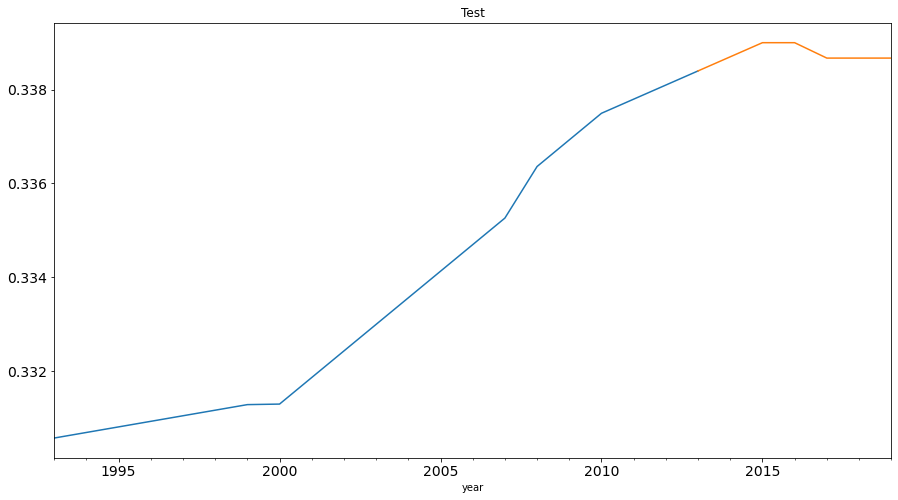

In [33]:
import matplotlib.pyplot as plt 
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

x = df_final.copy()
x = x[x["country_id"] == 116]
x = x[["year", "forest"]]
# len(x)

train=x[1:22] 
test= x[21:]

# train

train.Timestamp = pd.to_datetime(train.year,format='%Y') 
train.index = train.Timestamp 
train = train.resample('Y').mean() 

test.Timestamp = pd.to_datetime(test.year,format='%Y') 
test.index = test.Timestamp
test = test.resample('Y').mean()

train.forest.plot(figsize=(15,8), title= 'Train', fontsize=14)
test.forest.plot(figsize=(15,8), title= 'Test', fontsize=14)
plt.show()

C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


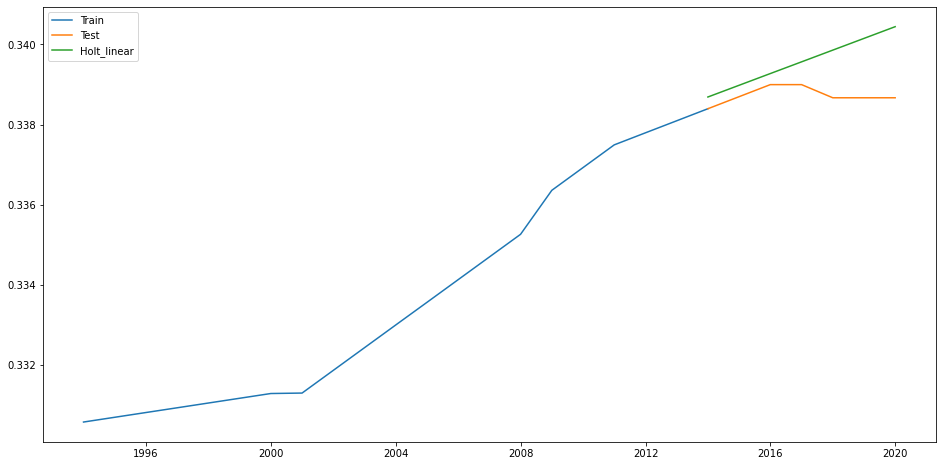

In [34]:
import numpy as np
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['forest'])).fit(smoothing_level=0.8,optimized=False)
fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.9)
# smoothing_slope = 0.7,

# y_hat_avg['SES'] = fit2.forecast(len(test))
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

# y_hat_avg
plt.figure(figsize=(16,8))
plt.plot(train['forest'], label='Train')
plt.plot(test['forest'], label='Test')
# plt.plot(y_hat_avg['SES'], label='SES')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# rms = sqrt(mean_squared_error(test.forest_area, y_hat_avg.SES))
rms = sqrt(mean_squared_error(test.forest, y_hat_avg.Holt_linear))
print(rms)

0.0010225245321141708


In [36]:
# Predict for year 2021 to 2025
data = {'years': [2021,2022,2023,2024,2025], 'forecast': [0,0,0,0,0]}
predict = pd.DataFrame(data=data)
# predict['forecast'] = fit2.forecast(len(predict))
predict['forecast'] = fit1.forecast(len(predict))

predict


,years,forecast
0,2021,0.338689
1,2022,0.338981
2,2023,0.339273
3,2024,0.339566
4,2025,0.339858


In [37]:
# Predict next 5 years score for all countries based on exponential smoothing model 

for country_id in df_final.country_id.unique():
    
    data = {'year': [2021,2022,2023,2024,2025], 'forest': [0,0,0,0,0]}
    predict = pd.DataFrame(data=data)
    print(country_id)
    
    x = df_final.copy()
    x = x[x["country_id"] == country_id]
    x = x[["year", "forest"]]

    train=x[1:25] 
    test= x[24:]

    train.Timestamp = pd.to_datetime(train.year,format='%Y') 
    train.index = train.Timestamp 
    train = train.resample('Y').mean() 

    test.Timestamp = pd.to_datetime(test.year,format='%Y') 
    test.index = test.Timestamp
    test = test.resample('Y').mean()
    
    y_hat_avg = test.copy()
#     fit2 = SimpleExpSmoothing(np.asarray(train['forest_area'])).fit(smoothing_level=0.75,optimized=False)
#     y_hat_avg['SES'] = fit2.forecast(len(test))
    fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
    y_hat_avg['Holt_linear'] = fit1.forecast(len(test))
    

    predict['country_id'] = country_id
    predict['info'] = 'predicted'
#     predict['forest_area'] = fit2.forecast(len(predict))
    predict['forest'] = fit1.forecast(len(predict))
    
    
    df_final = pd.concat([df_final, predict], join = "outer")
    
    
    


139
193
0
96


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1439: 

148
218


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: C

209
150
140
64


C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: F

210
88
43
38


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

99
167


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

8
129
30
113
31


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

100
122
101
89


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

196
68
151
180


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

71


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

102
90
181
224
183


C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: F

211
36
212
48
198
91


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

49
105
74
92
169
184


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

142
130
153
185
154
200


C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: F

75
125
155
117


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: C

14
156
187
40
2


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

188
16
132
52
201


<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be crea

53
17
93
126
3
19


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

133
41
145
216
222
94


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

54
189
146
95
226


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

106
107
134
170
204
172


<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is dep

21
242
37
160
57
206


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

58
135
207
42
208
147


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

191
217
119
136
59
244


<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be crea

85
5
163
25
175
164


<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be crea

192
116
110
27
28


<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['forest'])).fit(smoothing_level = 0.8,smoothing_slope = 0.8)
<ipython-input-37-54ed044ce642>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.year,format='%Y')
<ipython-input-37-54ed044ce642>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.year,format='%Y')
C:\Users\u978275\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-54ed044ce642>:27: FutureWarning: the 'smoothing_slope'' keyword is dep

In [38]:
df_final[(df_final["info"] == "predicted") & (df_final["country_id"] == 144)]

,year,hdi,inflation,infant_mortality,gdp,gni,forest,population,unemployment,country_id,info


In [39]:
# Round to forest % and KPI %age to 4  decimal places

for col in df_final.columns:
    if df_final.dtypes[col] == "float64" :
        df_final[col] = df_final[col].round(decimals = 4)
df_final.tail()

,year,hdi,inflation,infant_mortality,gdp,gni,forest,population,unemployment,country_id,info
0,2021,NaN,NaN,NaN,NaN,NaN,0.4545,NaN,NaN,28,predicted
1,2022,NaN,NaN,NaN,NaN,NaN,0.4533,NaN,NaN,28,predicted
2,2023,NaN,NaN,NaN,NaN,NaN,0.4521,NaN,NaN,28,predicted
3,2024,NaN,NaN,NaN,NaN,NaN,0.4509,NaN,NaN,28,predicted
4,2025,NaN,NaN,NaN,NaN,NaN,0.4497,NaN,NaN,28,predicted


In [40]:
# df_final = df_final[["year", "hdi", "inflation", "infant_mortality", "gdp","gni", "forest", "population", "unemployment","country_id", "info", "forest_area"  ]]
df_final.to_csv('data_measurements.csv', index=False)

In [67]:
df_final.dtypes

year                 object
hdi                 float64
inflation           float64
infant_mortality    float64
gdp                 float64
gni                 float64
forest              float64
population          float64
unemployment        float64
country_id            int64
info                 object
dtype: object